In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
odf=pd.read_csv('C:\\Users\\manoj\\Downloads\\archive\\online_shoppers_intention.csv')
odf.head()
odf.fillna(0,inplace=True)

In [4]:
print("Number of rows:",odf.shape[0])
print("Number of columns:",odf.shape[1])

Number of rows: 12330
Number of columns: 18


In [5]:
odf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
odf.describe().T


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


# Label Enabling


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   
odf['Revenue_encoded']=le.fit_transform(odf['Revenue'])
odf.drop('Revenue',axis=1,inplace=True)
odf['Month_encoded']=le.fit_transform(odf['Month'])
odf.drop('Month',axis=1,inplace=True)
odf['VisitorType_encoded']=le.fit_transform(odf['VisitorType'])
odf.drop('VisitorType',axis=1,inplace=True)
odf['Weekend_encoded']=le.fit_transform(odf['Weekend'])
odf.drop('Weekend',axis=1,inplace=True)

In [8]:
raw_dataset=odf.copy()


Dropping Informational_Duration as it has 80% 0 value so the model is getting biased, also it is correlated with Informational feature¶


In [9]:
odf.drop('Informational_Duration',axis=1,inplace=True)


Clubbing row values of Informational as it has 78% 0 value¶


In [69]:
#odf['Informational']=odf['Informational'].where(odf['Informational']<3.0,np.nan)


In [10]:
#odf['Informational'].value_counts(normalize=True)*100


In [11]:
#odf['Informational'].fillna(3,inplace=True)


Clubbing row values of PageValues as it has maximum 0 value¶


In [72]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<35.0,np.nan)


In [73]:
#odf['PageValues'].fillna(4,inplace=True)


In [74]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<15.0,np.nan)


In [75]:
#odf['PageValues'].fillna(3,inplace=True)


In [76]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<7.0,np.nan)


In [77]:
#odf['PageValues'].fillna(2,inplace=True)


In [78]:
#odf['PageValues']=odf['PageValues'].where((odf['PageValues']==0.0)|(odf['PageValues']==4.0)|(odf['PageValues']==2.0)|(odf['PageValues']==3.0),np.nan)


In [79]:
#odf['PageValues'].fillna(1,inplace=True)


In [12]:
odf['PageValues'].value_counts(normalize=True)*100


0.000000     77.858881
53.988000     0.048662
42.293068     0.024331
40.278152     0.016221
12.558857     0.016221
               ...    
1.625051      0.008110
20.157102     0.008110
8.191923      0.008110
12.587222     0.008110
30.203577     0.008110
Name: PageValues, Length: 2704, dtype: float64

# checking null values


In [13]:
odf.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Revenue_encoded            0
Month_encoded              0
VisitorType_encoded        0
Weekend_encoded            0
dtype: int64

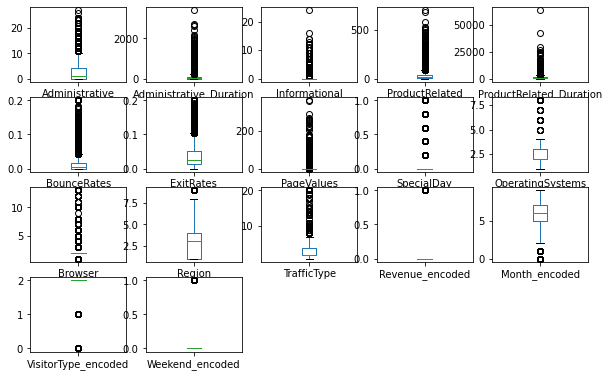

In [14]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), figsize=(10,8))
plt.show()

# Treating outliers¶


In [15]:
q1_a=np.quantile(odf['Administrative'],q=0.25)
q2_a=np.quantile(odf['Administrative'],q=0.50)
q3_a=np.quantile(odf['Administrative'],q=0.75)
iqr_a=q3_a-q1_a
ll_a=q1_a-(1.5*iqr_a)
ul_a=q3_a+(1.5*iqr_a)

# Administrative_Duration
q1_ad=np.quantile(odf['Administrative_Duration'],q=0.25)
q2_ad=np.quantile(odf['Administrative_Duration'],q=0.50)
q3_ad=np.quantile(odf['Administrative_Duration'],q=0.75)
iqr_ad=q3_ad-q1_ad
ll_ad=q1_ad-(1.5*iqr_ad)
ul_ad=q3_ad+(1.5*iqr_ad)

# Informational

q1_i=np.quantile(odf['Informational'],q=0.25)
q2_i=np.quantile(odf['Informational'],q=0.50)
q3_i=np.quantile(odf['Informational'],q=0.75)
iqr_i=q3_i-q1_i
ll_i=q1_i-(1.5*iqr_i)
ul_i=q3_i+(1.5*iqr_i)
# ProductRelated 
q1_t=np.quantile(odf['ProductRelated'],q=0.25)
q2_t=np.quantile(odf['ProductRelated'],q=0.50)
q3_t=np.quantile(odf['ProductRelated'],q=0.75)
iqr_t=q3_t-q1_t
ll_t=q1_t-(1.5*iqr_t)
ul_t=q3_t+(1.5*iqr_t)

# ProductRelated_Duration
q1_pd=np.quantile(odf['ProductRelated_Duration'],q=0.25)
q2_pd=np.quantile(odf['ProductRelated_Duration'],q=0.50)
q3_pd=np.quantile(odf['ProductRelated_Duration'],q=0.75)
iqr_pd=q3_pd-q1_pd
ll_pd=q1_pd-(1.5*iqr_pd)
ul_pd=q3_pd+(1.5*iqr_pd)

# BounceRates
q1_b=np.quantile(odf['BounceRates'],q=0.25)
q2_b=np.quantile(odf['BounceRates'],q=0.50)
q3_b=np.quantile(odf['BounceRates'],q=0.75)
iqr_b=q3_b-q1_b
ll_b=q1_b-(1.5*iqr_b)
ul_b=q3_b+(1.5*iqr_b)

# ExitRates
q1_e=np.quantile(odf['ExitRates'],q=0.25)
q2_e=np.quantile(odf['ExitRates'],q=0.50)
q3_e=np.quantile(odf['ExitRates'],q=0.75)
iqr_e=q3_e-q1_e
ll_e=q1_e-(1.5*iqr_e)
ul_e=q3_e+(1.5*iqr_e)

# PageValues
q1_p=np.quantile(odf['PageValues'],q=0.25)
q2_p=np.quantile(odf['PageValues'],q=0.50)
q3_p=np.quantile(odf['PageValues'],q=0.75)
iqr_p=q3_p-q1_p
ll_p=q1_p-(1.5*iqr_p)
ul_p=q3_p+(1.5*iqr_p)

replacing outliers with null values¶


In [16]:
#odf['Administrative']=odf['Administrative'].where(odf['Administrative']<=ul_a,np.nan)
odf['Administrative_Duration']=odf['Administrative_Duration'].where(odf['Administrative_Duration']<=ul_ad,np.nan)
odf['ProductRelated']=odf['ProductRelated'].where(odf['ProductRelated']<=ul_t,np.nan)
odf['BounceRates']=odf['BounceRates'].where(odf['BounceRates']<=ul_b,np.nan)
odf['ExitRates']=odf['ExitRates'].where(odf['ExitRates']<=ul_e,np.nan)
odf['ProductRelated_Duration']=odf['ProductRelated_Duration'].where(odf['ProductRelated_Duration']<=ul_pd,np.nan)

In [17]:
odf.isnull().sum()


Administrative                0
Administrative_Duration    1172
Informational                 0
ProductRelated              987
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                    0
SpecialDay                    0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
Revenue_encoded               0
Month_encoded                 0
VisitorType_encoded           0
Weekend_encoded               0
dtype: int64

# MICE for replacing above null values


In [18]:
pip install impyute


Note: you may need to restart the kernel to use updated packages.


In [19]:
from impyute.imputation.cs import mice

# start the MICE training
#m=mice(odf)
odf[['Administrative','Administrative_Duration','Informational','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Revenue_encoded','Month_encoded','VisitorType_encoded','Weekend_encoded']].to_numpy()

array([[ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  2.,  1.],
       [ 4., 75.,  0., ...,  7.,  2.,  0.],
       [ 0.,  0.,  0., ...,  7.,  0.,  1.]])

In [20]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  11158 non-null  float64
 2   Informational            12330 non-null  int64  
 3   ProductRelated           11343 non-null  float64
 4   ProductRelated_Duration  11369 non-null  float64
 5   BounceRates              10779 non-null  float64
 6   ExitRates                11231 non-null  float64
 7   PageValues               12330 non-null  float64
 8   SpecialDay               12330 non-null  float64
 9   OperatingSystems         12330 non-null  int64  
 10  Browser                  12330 non-null  int64  
 11  Region                   12330 non-null  int64  
 12  TrafficType              12330 non-null  int64  
 13  Revenue_encoded          12330 non-null  int64  
 14  Month_encoded         

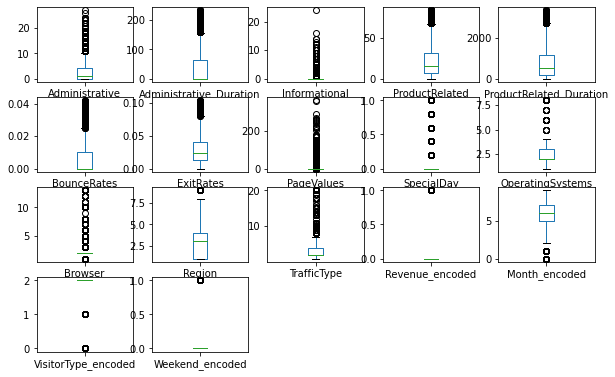

In [21]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), figsize=(10,8))
plt.show()

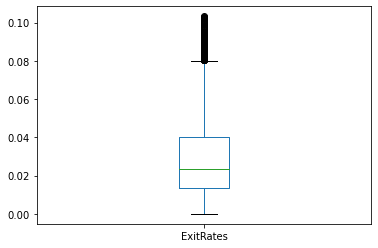

In [22]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [23]:
odf=odf.drop_duplicates()


In [24]:
odf.shape


(12203, 17)

# Median
odf['Administrative']=odf['Administrative'].where(odf['Administrative']<=ul_a,odf['Administrative'].median()) odf['Administrative_Duration']=odf['Administrative_Duration'].where(odf['Administrative_Duration']<=ul_ad,odf['Administrative_Duration'].median()) odf['ProductRelated']=odf['ProductRelated'].where(odf['ProductRelated']<=ul_t,odf['ProductRelated'].median()) odf['BounceRates']=odf['BounceRates'].where(odf['BounceRates']<=ul_b,odf['BounceRates'].median()) odf['ExitRates']=odf['ExitRates'].where(odf['ExitRates']<=ul_e,odf['ExitRates'].median()) odf['ProductRelated_Duration']=odf['ProductRelated_Duration'].where(odf['ProductRelated_Duration']<=ul_pd,odf['ProductRelated_Duration'].median())

In [25]:
odf[odf['ExitRates']>ul_e]


,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded


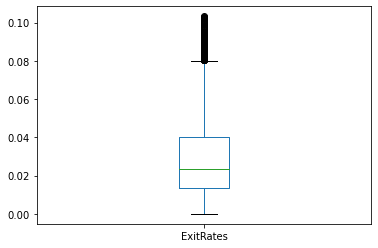

In [26]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [27]:
odf['OperatingSystems'].value_counts(normalize=True)*100


2    53.593379
1    20.880111
3    20.732607
4     3.917070
8     0.614603
6     0.155699
7     0.057363
5     0.049168
Name: OperatingSystems, dtype: float64

In [28]:
odf['Region'].value_counts(normalize=True)*100


1    38.613456
3    19.495206
4     9.596001
2     9.243629
6     6.563960
7     6.211587
9     4.138327
8     3.531918
5     2.605917
Name: Region, dtype: float64

In [29]:
odf['Browser'].value_counts(normalize=True)*100


2     64.590674
1     19.880357
4      5.990330
5      3.810538
6      1.425879
10     1.335737
8      1.106285
3      0.860444
13     0.458904
7      0.401541
12     0.081947
11     0.049168
9      0.008195
Name: Browser, dtype: float64

In [30]:
odf['TrafficType'].value_counts(normalize=True)*100


2     32.041301
1     19.560764
3     16.495944
4      8.735557
13     5.965746
10     3.687618
6      3.630255
8      2.810784
5      2.130624
11     2.024092
20     1.581578
9      0.335983
7      0.327788
15     0.303204
19     0.139310
14     0.106531
18     0.081947
16     0.024584
12     0.008195
17     0.008195
Name: TrafficType, dtype: float64

# EDA

# Univariate Analysis¶


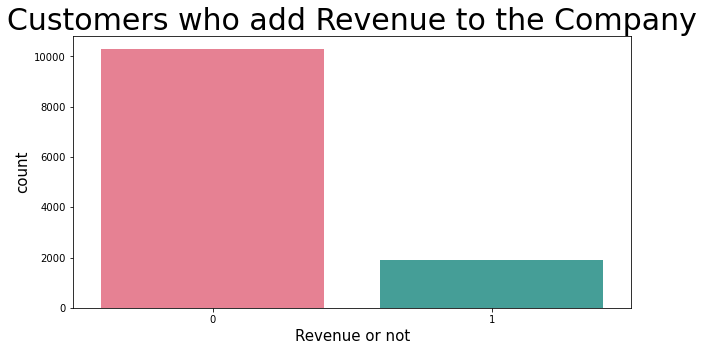

In [31]:

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Revenue_encoded'], palette = 'husl')
plt.title('Customers who add Revenue to the Company', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

# Weekend

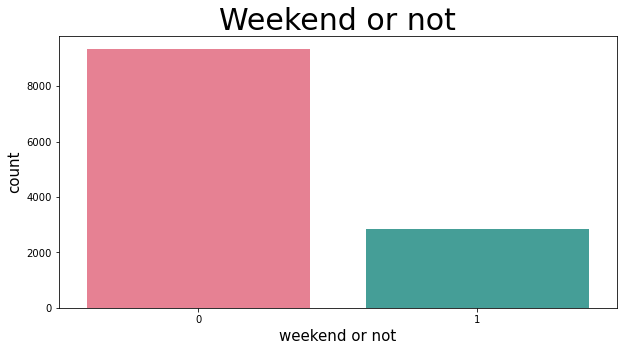

In [32]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Weekend_encoded'], palette = 'husl')
plt.title('Weekend or not', fontsize = 30)
plt.xlabel('weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

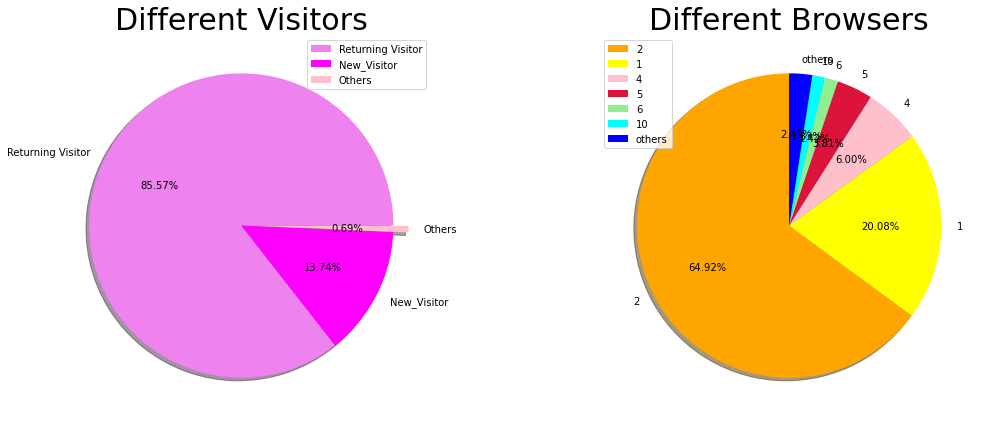

In [33]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

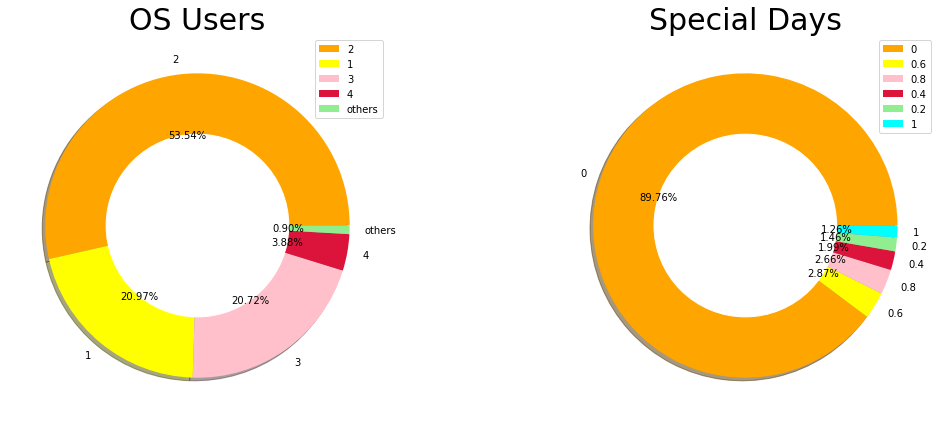

In [120]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OS Users', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson','lightgreen', 'cyan']
explode = [0, 0, 0, 0, 0, 0]
labels = "0", "0.6","0.8","0.4","0.2","1"

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(odf['SpecialDay'].value_counts(), colors = colors, labels = labels,explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

In [34]:
odf['OperatingSystems'].value_counts()


2    6540
1    2548
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

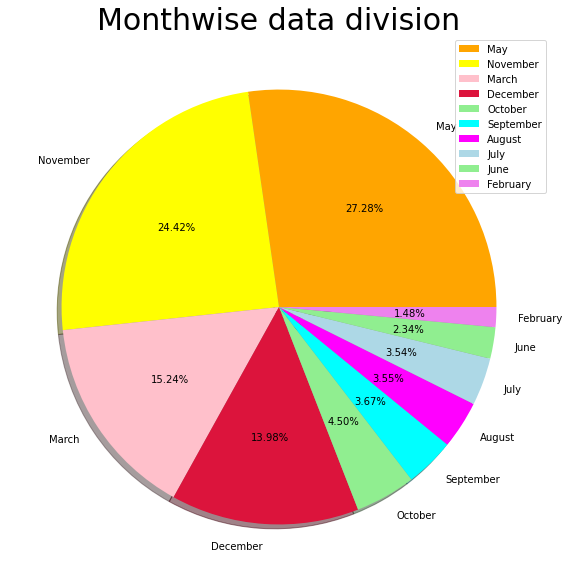

In [122]:
#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(odf['Month_encoded'].value_counts(), colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Monthwise data division', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

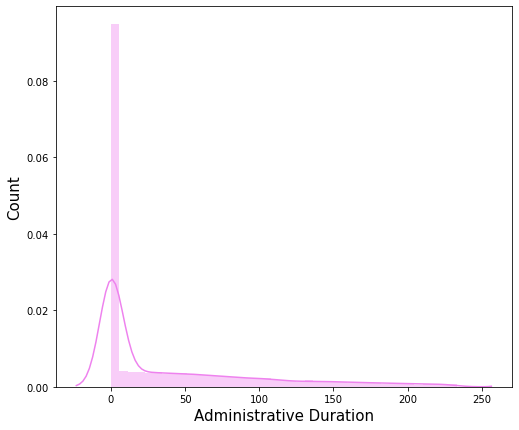

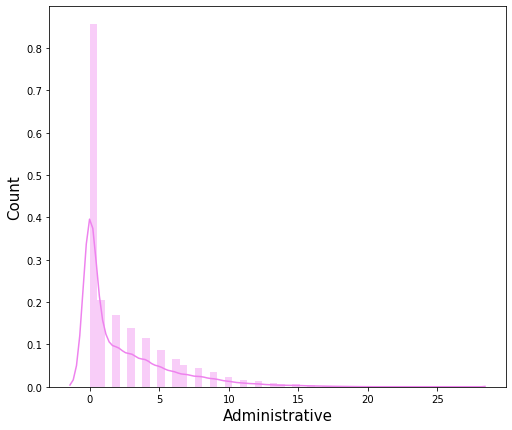

In [35]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['Administrative_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['Administrative'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


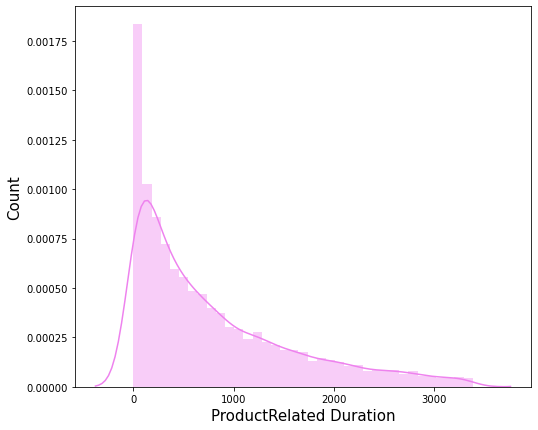

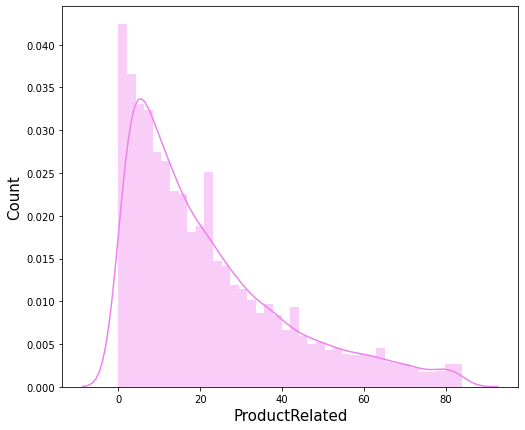

In [124]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['ProductRelated_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('ProductRelated Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ProductRelated'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

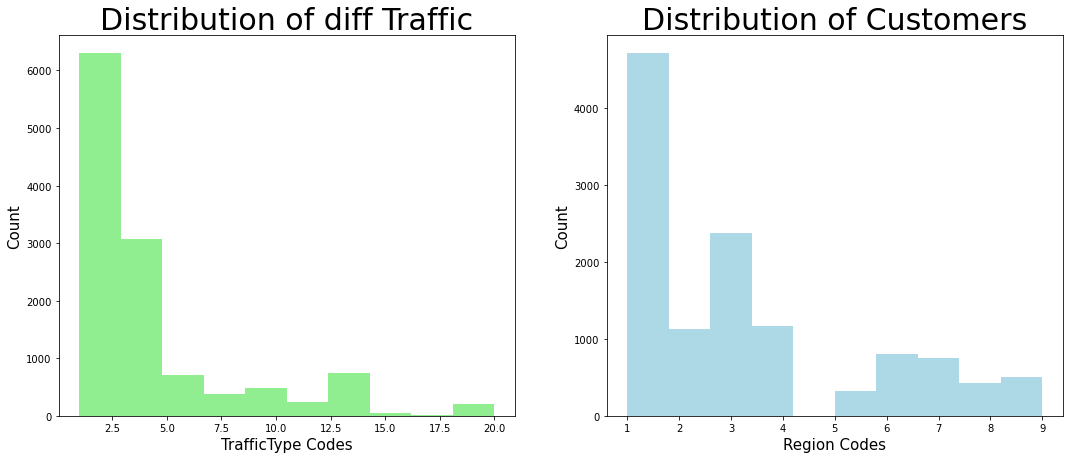

In [36]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(odf['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(odf['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

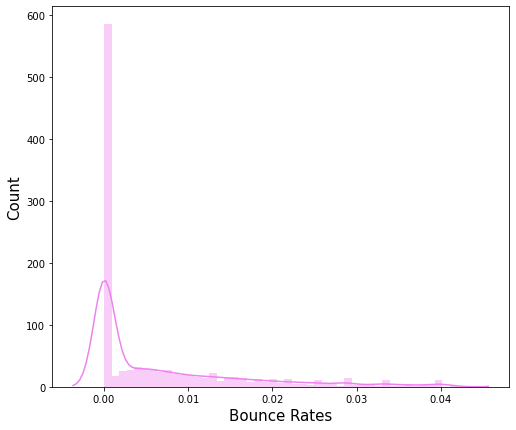

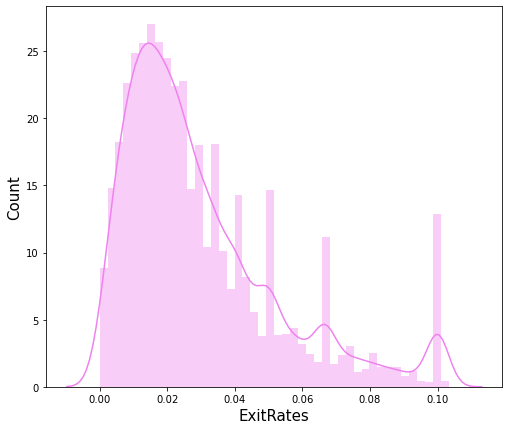

In [37]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['BounceRates'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ExitRates'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


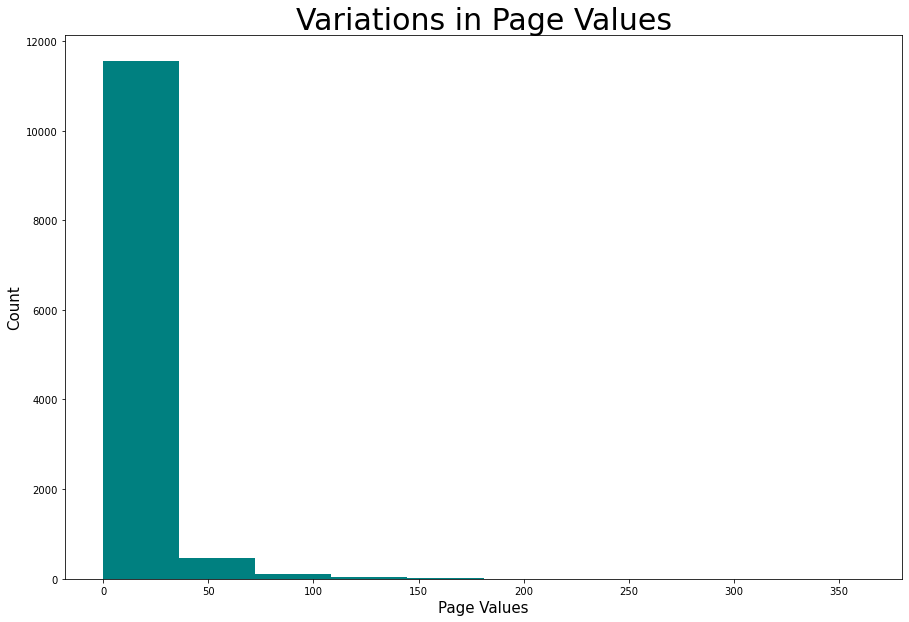

In [38]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(odf['PageValues'], color = 'teal')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

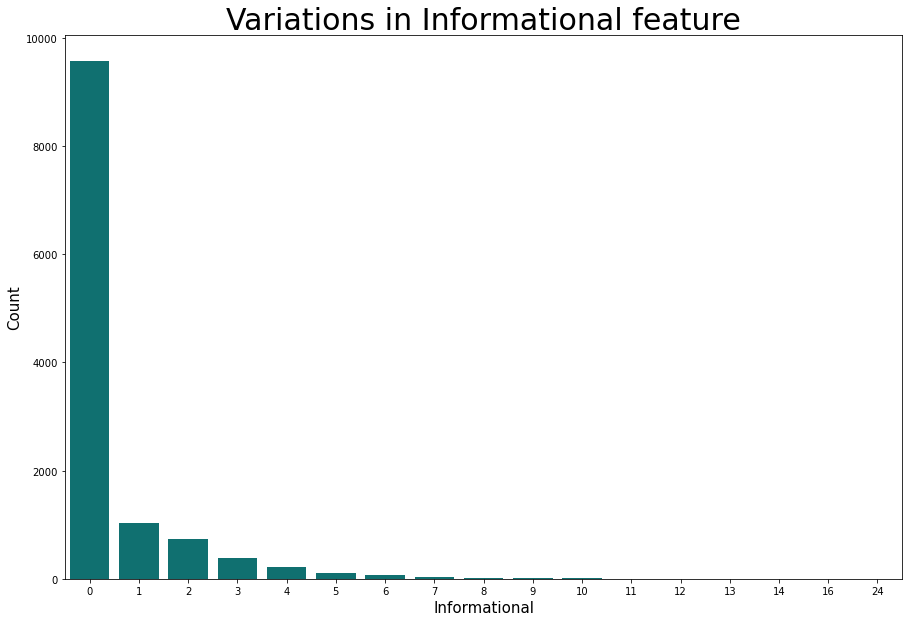

In [39]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(odf['Informational'], color = 'teal')
plt.title('Variations in Informational feature', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Bivariate Analysis

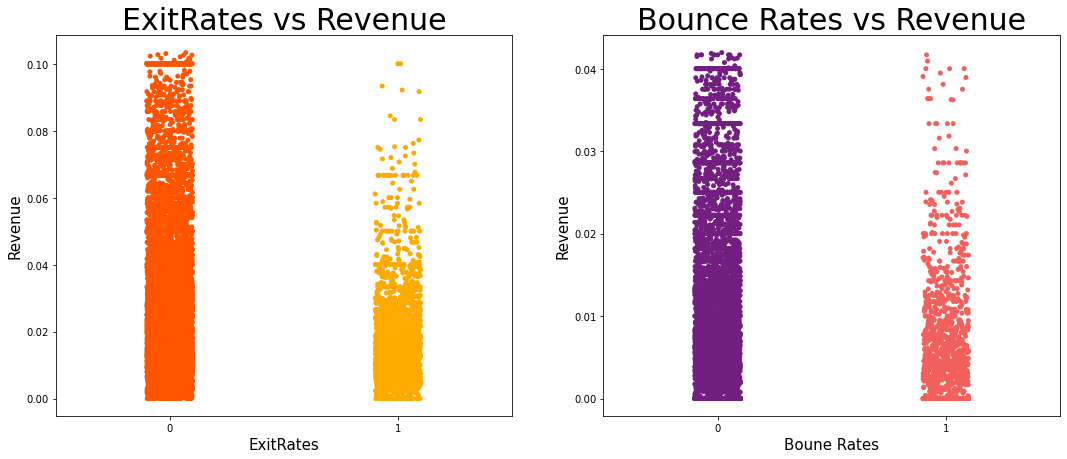

In [40]:
# exit rate vs revenue
y=odf['Revenue_encoded']
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(y, odf['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(y, odf['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

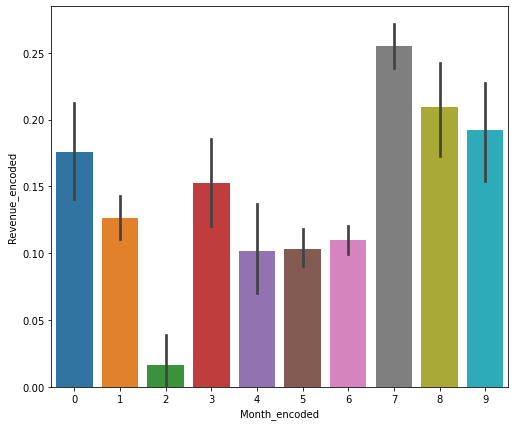

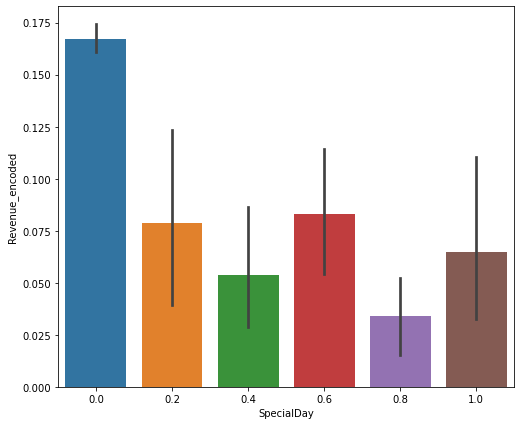

In [130]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Month_encoded'],y=odf['Revenue_encoded'])
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(x=odf['SpecialDay'],y=odf['Revenue_encoded'])
plt.show()

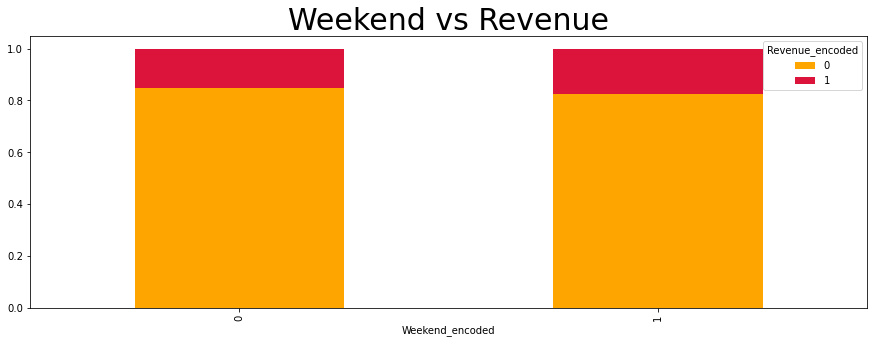

In [41]:
# weekend vs Revenue

df = pd.crosstab(odf['Weekend_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

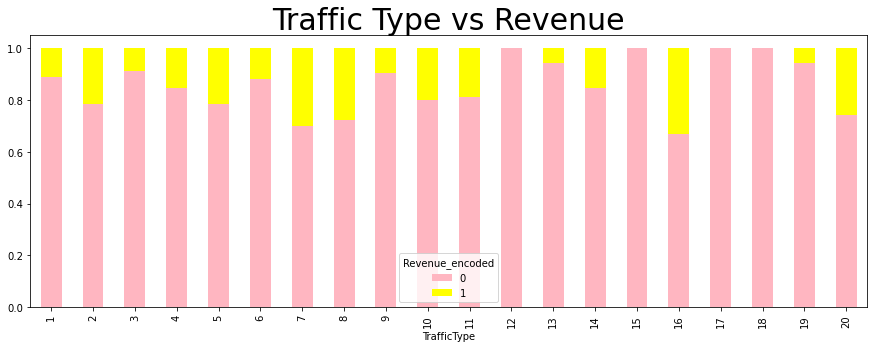

In [42]:
# Traffic Type vs Revenue

df = pd.crosstab(odf['TrafficType'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()


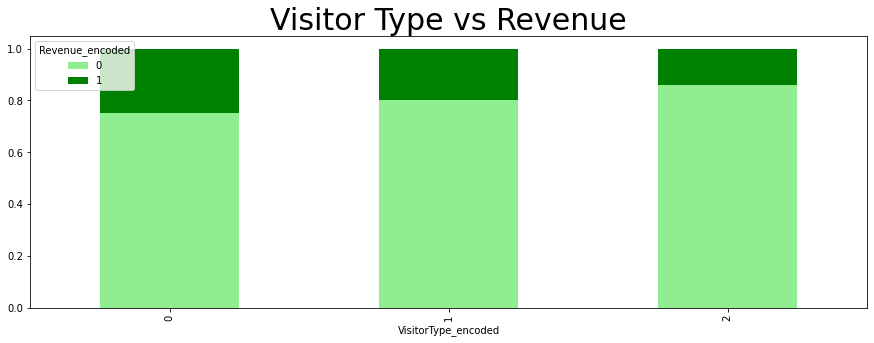

In [43]:
# visitor type vs revenue

df = pd.crosstab(odf['VisitorType_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


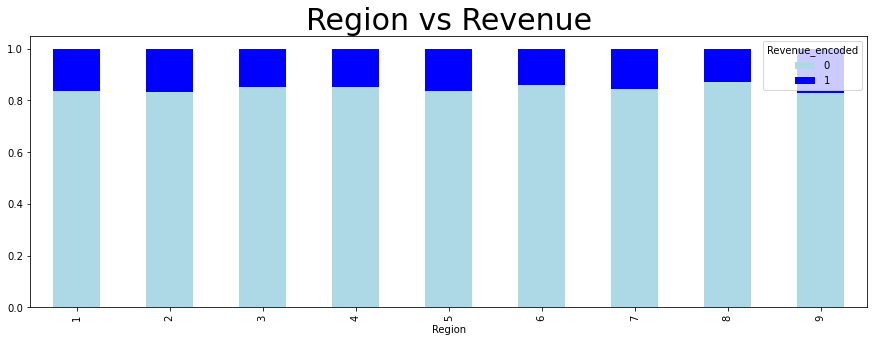

In [44]:
# region vs Revenue

df = pd.crosstab(odf['Region'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

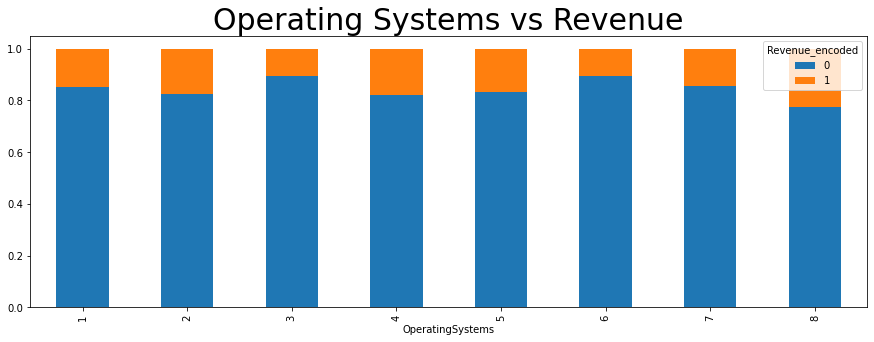

In [45]:
# region vs Revenue

df = pd.crosstab(odf['OperatingSystems'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Operating Systems vs Revenue', fontsize = 30)
plt.show()

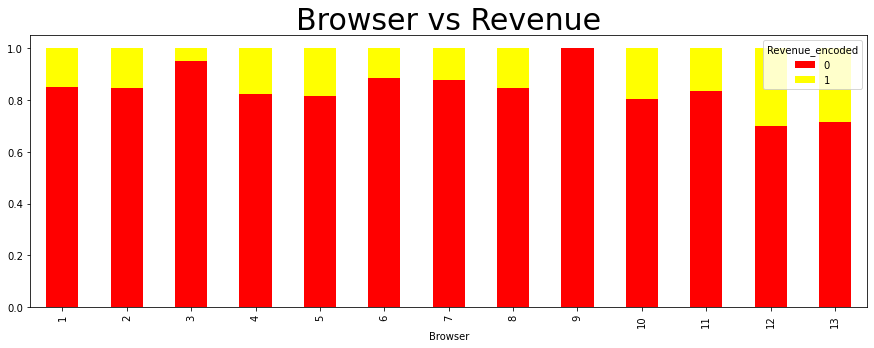

In [46]:
# region vs Revenue

df = pd.crosstab(odf['Browser'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['red', 'yellow'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

Text(0, 0.5, 'Revenue')

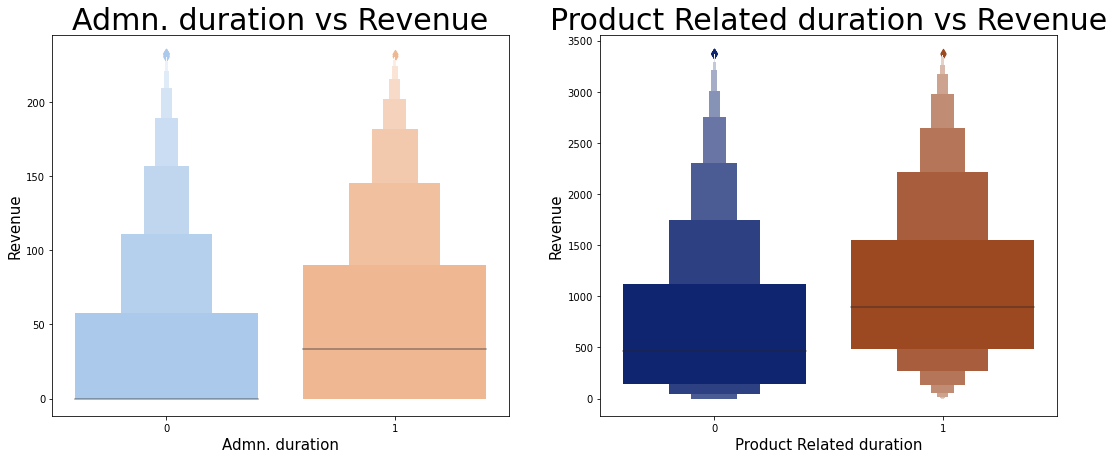

In [47]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(y, odf['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(y, odf['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

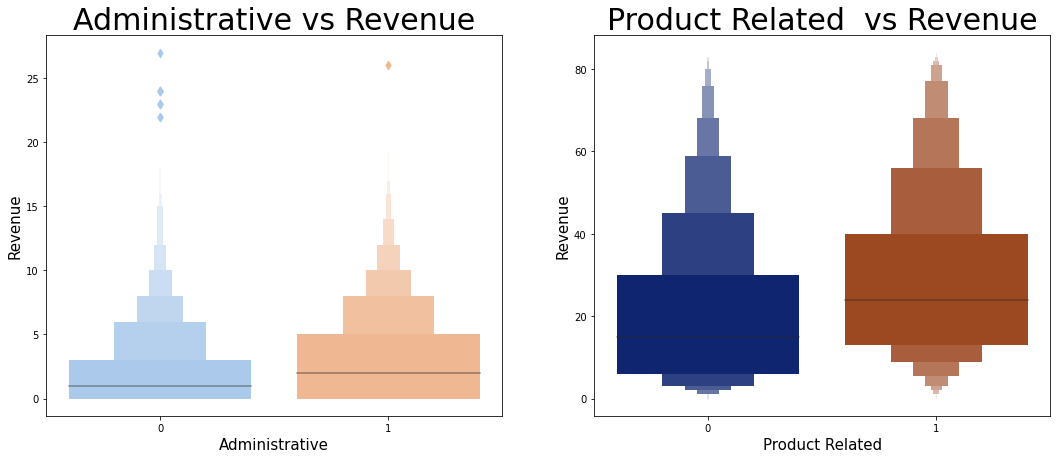

In [48]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(odf['Revenue_encoded'], odf['Administrative'], palette = 'pastel')
plt.title('Administrative vs Revenue', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(odf['Revenue_encoded'], odf['ProductRelated'], palette = 'dark')
plt.title('Product Related  vs Revenue', fontsize = 30)
plt.xlabel('Product Related', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

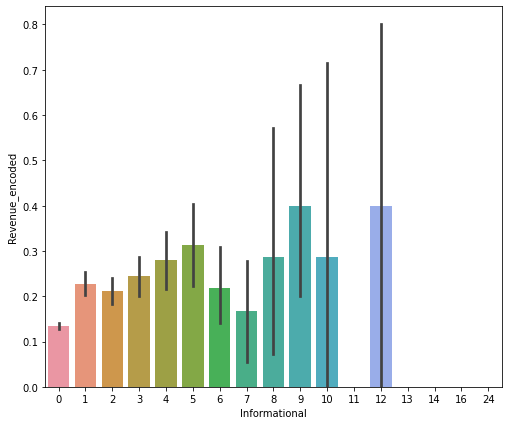

In [49]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Informational'],y=odf['Revenue_encoded'])
plt.show()

# Transformation

In [50]:
#df1 = odf.copy()
#df_final1 = df1.transform(lambda X: np.log(X))

In [51]:
df2 = odf.copy()
df2=df2[['Administrative_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']].transform(lambda x: x**0.5)
#final_df = df2.transform(lambda x: x**0.5)

In [52]:
odf=odf.drop(['Administrative_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues'],1)


In [53]:
odf=pd.concat((odf,df2),1)


In [54]:
odf.head()


,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0,1.0,0.0,1,1,1,1,0,2,2,0,0.0,0.000000,NaN,NaN,0.0
1,0,0,2.0,0.0,2,2,1,2,0,2,2,0,0.0,8.000000,0.000000,0.316228,0.0
2,0,0,1.0,0.0,4,1,9,3,0,2,2,0,0.0,0.000000,NaN,NaN,0.0
3,0,0,2.0,0.0,3,2,2,4,0,2,2,0,0.0,1.632993,NaN,NaN,0.0
4,0,0,10.0,0.0,3,3,1,4,0,2,2,1,0.0,25.049950,0.141421,0.223607,0.0


In [55]:
old_df=pd.read_csv('C:\\Users\\manoj\\Downloads\\archive\\online_shoppers_intention.csv')


In [56]:
#sns.kdeplot(df_final1['BounceRates'],shade=True)
#plt.show()


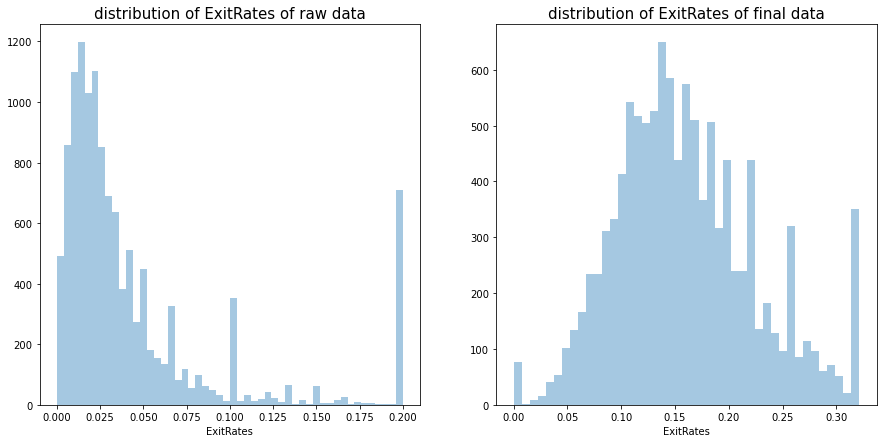

In [57]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['ExitRates'],kde=False)
plt.title('distribution of ExitRates of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['ExitRates'],kde=False)
plt.title('distribution of ExitRates of final data', fontsize = 15)

plt.show()

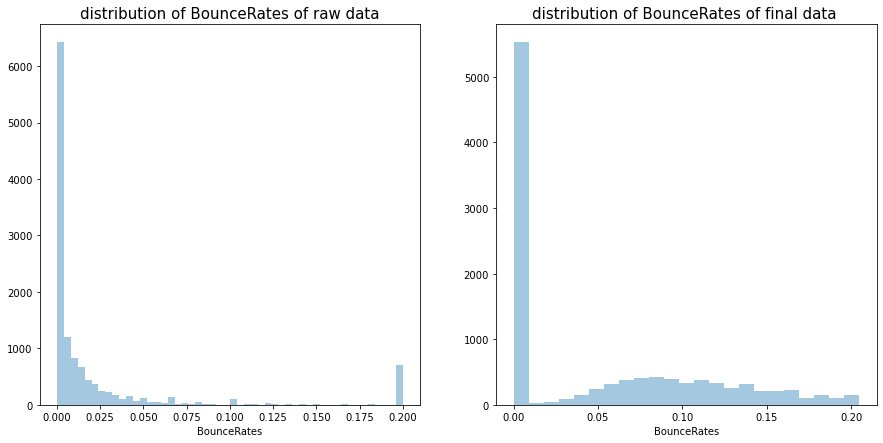

In [149]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['BounceRates'],kde=False)
plt.title('distribution of BounceRates of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['BounceRates'],kde=False)
plt.title('distribution of BounceRates of final data ', fontsize = 15)

plt.show()

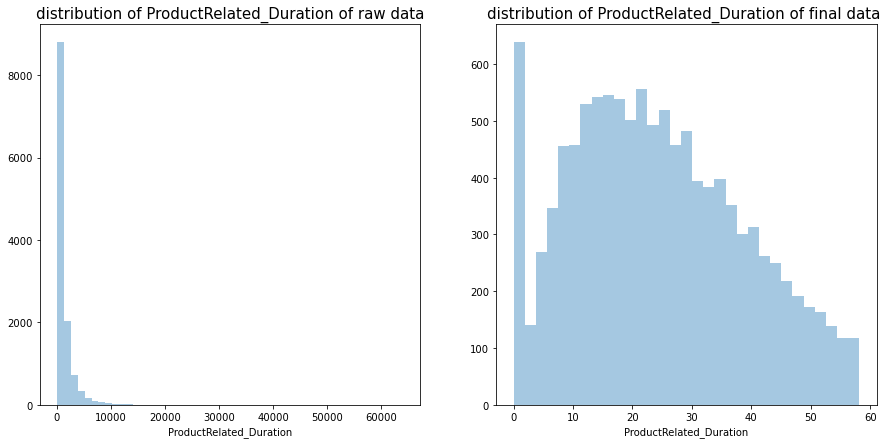

In [58]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['ProductRelated_Duration'],kde=False)
plt.title('distribution of ProductRelated_Duration of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['ProductRelated_Duration'],kde=False)
plt.title('distribution of ProductRelated_Duration of final data ', fontsize = 15)

plt.show()


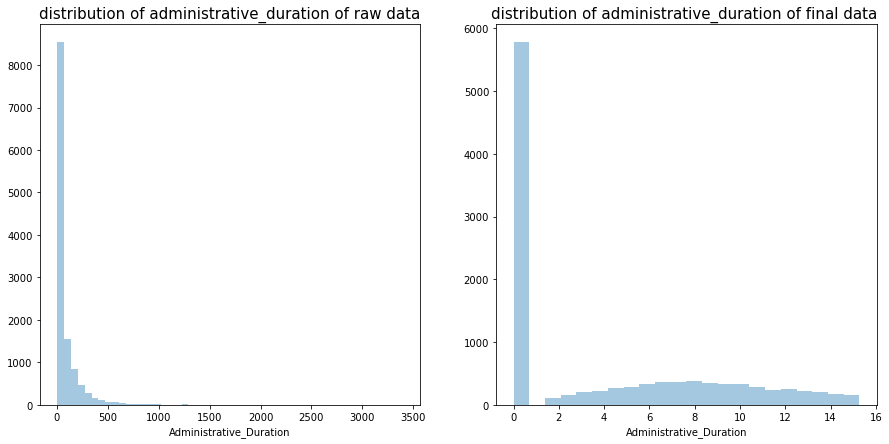

In [59]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['Administrative_Duration'],kde=False)
plt.title('distribution of administrative_duration of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['Administrative_Duration'],kde=False)
plt.title('distribution of administrative_duration of final data ', fontsize = 15)

plt.show()

In [112]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', odf = odf, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)

TypeError: lmplot() got an unexpected keyword argument 'odf'

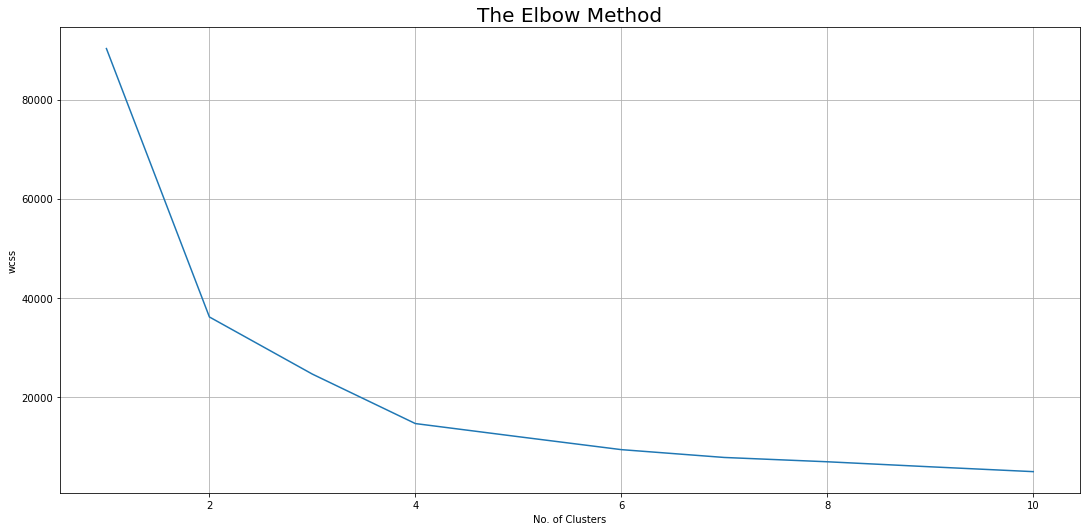

In [119]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = odf.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

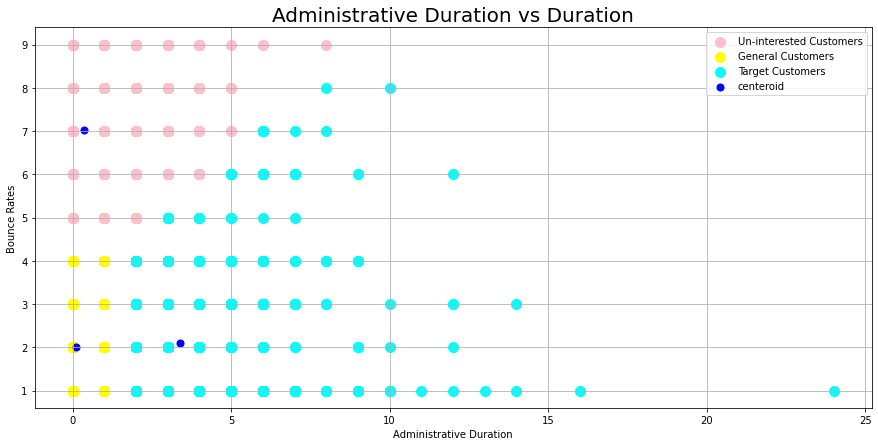

In [120]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.

There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a w



# 2. Informative Duration vs Bounce Rates

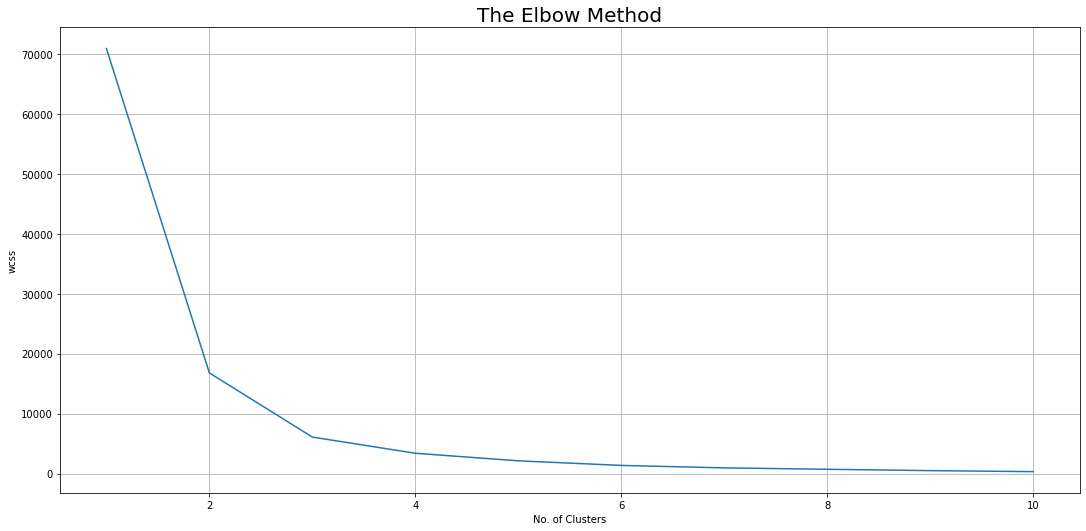

In [122]:
# informational duration vs Bounce Rates
x = odf.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

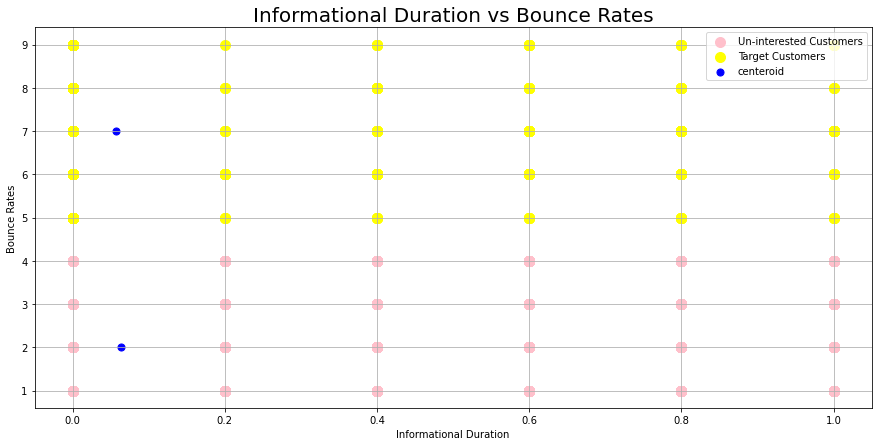

In [123]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

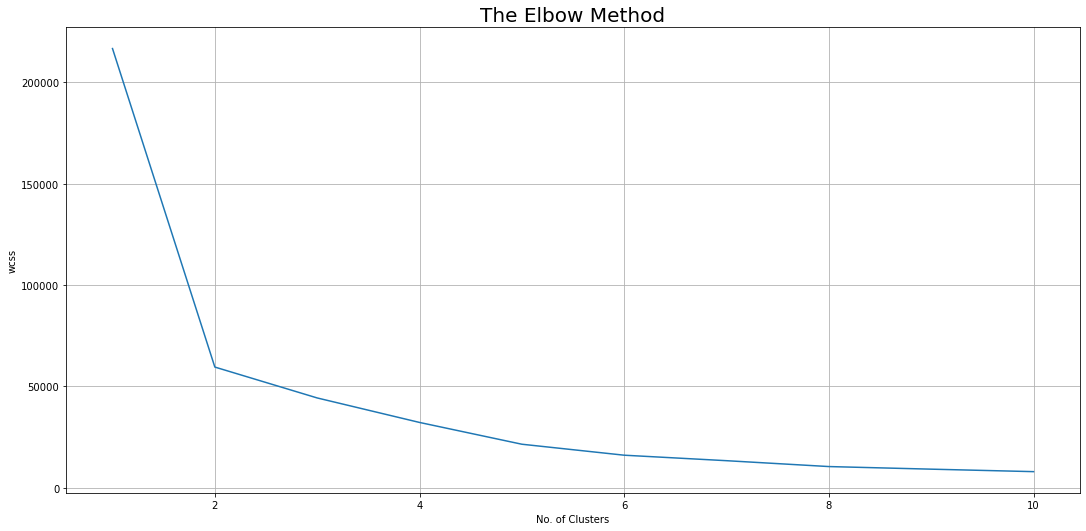

In [125]:
# informational duration vs Bounce Rates
x = odf.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

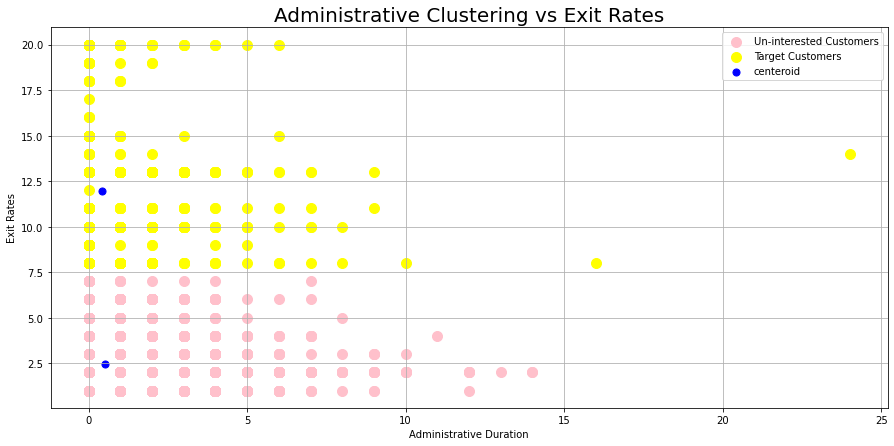

In [126]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()


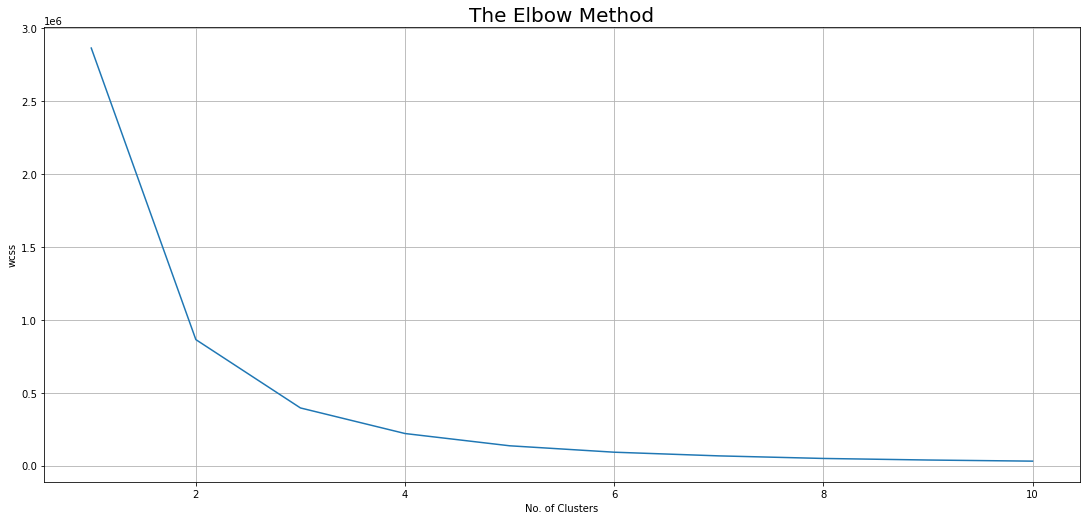

In [127]:
# informational duration vs Bounce Rates
x = odf.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

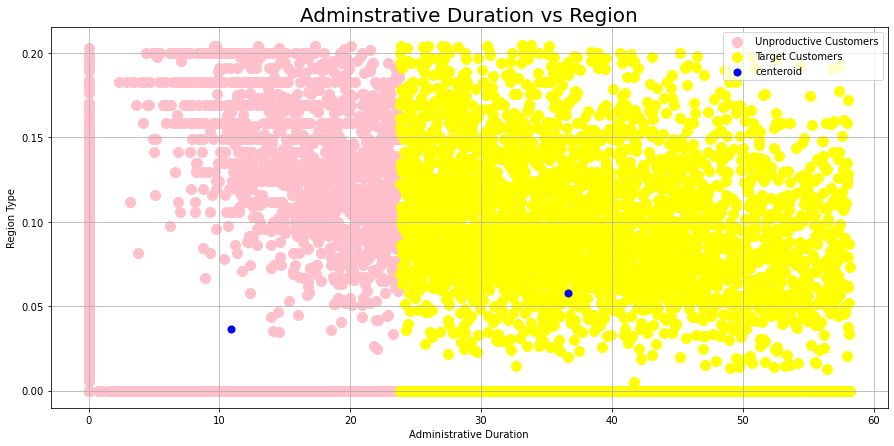

In [128]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

# Backward elimination


In [83]:
import statsmodels.api as sm
x=odf.drop('Revenue_encoded',axis=1)
y=odf['Revenue_encoded']
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('Final set of variables are: ',selected_features_BE)


Final set of variables are:  ['Informational', 'SpecialDay', 'OperatingSystems', 'Month_encoded', 'VisitorType_encoded', 'PageValues']


In [62]:
final_df=odf[['Informational', 'SpecialDay', 'OperatingSystems', 'Month_encoded', 'VisitorType_encoded', 'Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','Revenue_encoded']]
final_df.head()

,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue_encoded
0,0,0.0,1,2,2,0.0,0.000000,NaN,NaN,0.0,0
1,0,0.0,2,2,2,0.0,8.000000,0.000000,0.316228,0.0,0
2,0,0.0,4,2,2,0.0,0.000000,NaN,NaN,0.0,0
3,0,0.0,3,2,2,0.0,1.632993,NaN,NaN,0.0,0
4,0,0.0,3,2,2,0.0,25.049950,0.141421,0.223607,0.0,0


# Data Preprocessing

One Hot and Label Encoding

In [93]:
# one hot encoding 

odf1 = pd.get_dummies(odf)

odf1.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Revenue_encoded', 'Month_encoded', 'VisitorType_encoded',
       'Weekend_encoded', 'Administrative_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

In [94]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
odf['Revenue_encoded'] = le.fit_transform(odf['Revenue_encoded'])
odf['Revenue_encoded'].value_counts()

0    10295
1     1908
Name: Revenue_encoded, dtype: int64

In [95]:
x = odf1
x = x.drop(['Revenue_encoded'], axis = 1)

y = odf['Revenue_encoded']
odf.fillna(0,inplace=True)
df.replace([np.inf, -np.inf], np.nan)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12203, 16)
Shape of y: (12203,)


# Splitting of the Data

In [96]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8542, 16)
Shape of y_train : (8542,)
Shape of x_test : (3661, 16)
Shape of y_test : (3661,)


# Random Forest Classifier

Training Accuracy : 0.9998829313977992
Testing Accuracy : 0.8972958208139853
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3095
           1       0.73      0.53      0.61       566

    accuracy                           0.90      3661
   macro avg       0.82      0.75      0.78      3661
weighted avg       0.89      0.90      0.89      3661



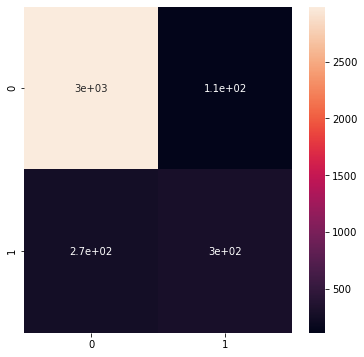

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Evaluating Model

In [102]:
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

C:\Users\manoj\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\manoj\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.1351 ± 0.0150,PageValues
0.0105 ± 0.0065,ExitRates
0.0061 ± 0.0022,Month_encoded
0.0042 ± 0.0026,Administrative
0.0040 ± 0.0024,BounceRates
0.0016 ± 0.0016,ProductRelated
0.0009 ± 0.0022,Administrative_Duration
0.0007 ± 0.0011,Informational
0.0005 ± 0.0012,VisitorType_encoded
0.0004 ± 0.0024,ProductRelated_Duration


# Partial Dependency Plots

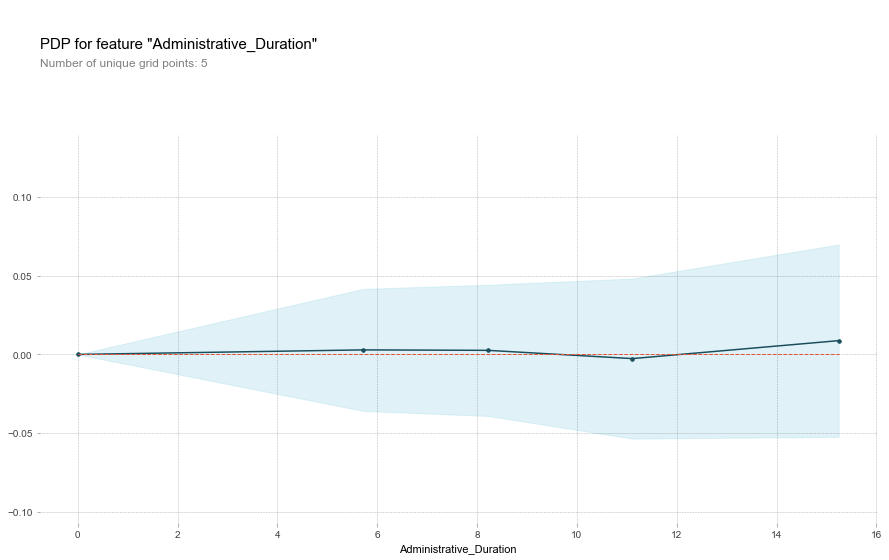

In [104]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

base_features = x_test.columns.values.tolist()

feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

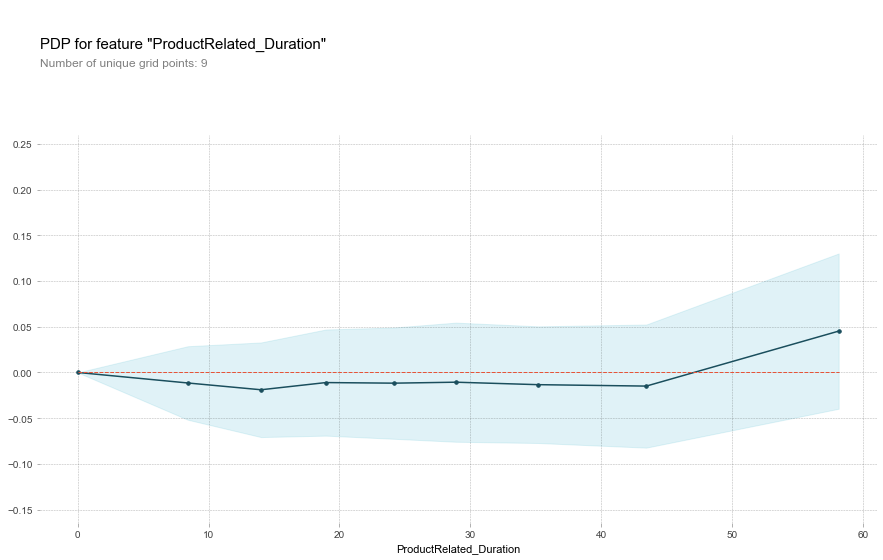

In [130]:
# plotting partial dependency plot for Informational Duration

base_features = x_test.columns.tolist()

feat_name = 'ProductRelated_Duration'
pdp_dist = pdp.pdp_isolate(model, x_test, base_features, feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

# shape value

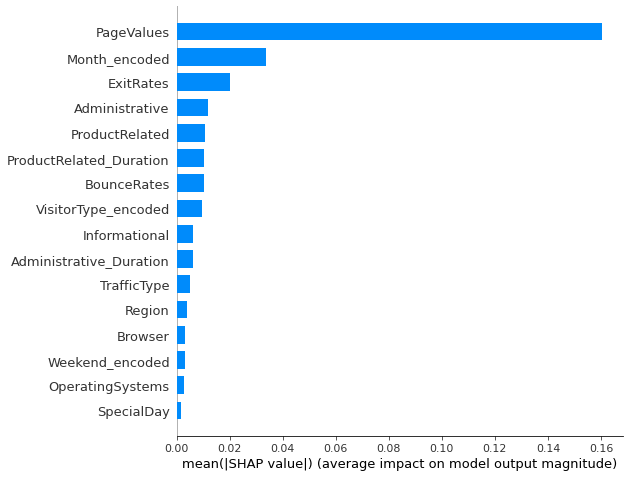

In [132]:
# let's take a look at the shap values

# importing shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type = 'bar')

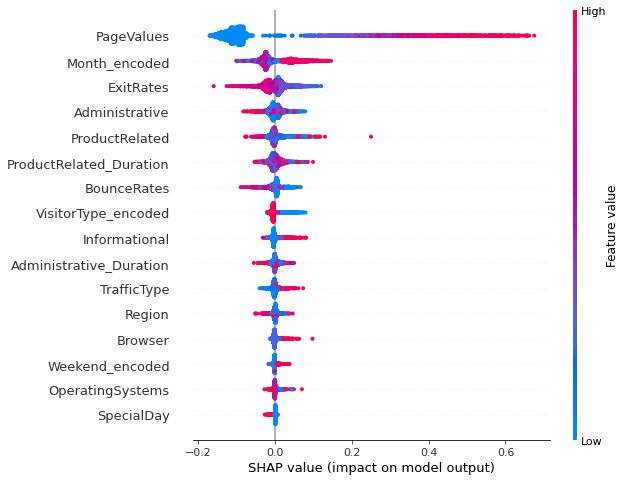

In [133]:
shap.summary_plot(shap_values[1], x_test)

In [140]:
df.replace([np.inf, -np.inf], 0)

Revenue_encoded,0,1
Browser,,
1,2061,365
2,6659,1223
3,100,5
4,601,130
5,379,86
6,154,20
7,43,6
8,114,21
9,1,0


# models on all features

In [134]:
#X=final_df.drop('Revenue_encoded',1)
X1=odf.drop('Revenue_encoded',1)
y1=final_df['Revenue_encoded']

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=100)

# Logistic Regression

In [135]:
################ logistic model: ##################

# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X1_train,y1_train)
y_pred = logreg.predict(X1_test)

print('accuracy score on train data',logreg.score(X1_train,y1_train))
print('accuracy score on train data',logreg.score(X1_test,y1_test))

accuracy score on train data 0.8893669330055316
accuracy score on train data 0.8889799262597297


# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X1_train,y1_train)

print('accuracy score training data :-',dt_default.score(X1_test,y1_test))
print('accuracy score training data :-',dt_default.score(X1_train,y1_train))

accuracy score training data :- 0.8496517820565342
accuracy score training data :- 1.0


# RF

In [141]:
rf=RandomForestClassifier()
rf.fit(X1_train,y1_train)

print('accuracy score training data :-',rf.score(X1_test,y1_test))
print('accuracy score training data :-',rf.score(X1_train,y1_train))

accuracy score training data :- 0.9061859893486276
accuracy score training data :- 1.0


In [142]:
import sklearn

bagging_lr=sklearn.ensemble.BaggingClassifier(base_estimator=logreg)
bagging_lr.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_lr.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_lr.score(X1_train,y1_train))

accuracy score training data :- 0.8885702580909464
accuracy score training data :- 0.8892644949805367


In [143]:
bagging_rf=sklearn.ensemble.BaggingClassifier(base_estimator=rf)
bagging_rf.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_rf.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_rf.score(X1_train,y1_train))

accuracy score training data :- 0.9045473166734944
accuracy score training data :- 0.977361196476132


In [158]:
from sklearn.preprocessing import StandardScaler


In [159]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_train

array([[-0.39878196, -0.311666  , -1.24513018, ...,  0.36948827,
         0.6013049 ,  0.5547681 ],
       [-0.39878196, -0.311666  , -1.24513018, ..., -0.84566567,
         0.33844322, -0.4563593 ],
       [ 0.39763978, -0.311666  , -0.13842338, ..., -0.84566567,
        -0.75827782, -0.4563593 ],
       ...,
       [ 1.19406153, -0.311666  ,  0.96828343, ..., -0.84566567,
        -0.59131308, -0.4563593 ],
       [-0.39878196, -0.311666  , -0.13842338, ..., -0.84566567,
        -1.76034691, -0.4563593 ],
       [-0.39878196, -0.311666  , -0.13842338, ...,         nan,
                nan, -0.4563593 ]])

In [160]:
X_train=pd.DataFrame(X_train)
X_train.columns=X_test.columns
X_train.head()

,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.398782,-0.311666,-1.245130,0.774948,0.407074,0.509329,0.659882,0.369488,0.601305,0.554768
1,-0.398782,-0.311666,-1.245130,-1.760113,0.407074,-0.831195,-1.206753,-0.845666,0.338443,-0.456359
2,0.397640,-0.311666,-0.138423,-0.070072,0.407074,0.820465,1.994595,-0.845666,-0.758278,-0.456359
3,-0.398782,-0.311666,-1.245130,-0.492582,0.407074,0.616487,-1.254011,-0.845666,0.974318,-0.456359
4,-0.398782,2.670186,0.968283,0.352438,0.407074,-0.831195,-1.675929,NaN,NaN,-0.456359


In [161]:
X_test=ss.transform(X_test)
X_test=pd.DataFrame(X_test)
X_test.columns=X_train.columns
X_train.head()

,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.398782,-0.311666,-1.245130,0.774948,0.407074,0.509329,0.659882,0.369488,0.601305,0.554768
1,-0.398782,-0.311666,-1.245130,-1.760113,0.407074,-0.831195,-1.206753,-0.845666,0.338443,-0.456359
2,0.397640,-0.311666,-0.138423,-0.070072,0.407074,0.820465,1.994595,-0.845666,-0.758278,-0.456359
3,-0.398782,-0.311666,-1.245130,-0.492582,0.407074,0.616487,-1.254011,-0.845666,0.974318,-0.456359
4,-0.398782,2.670186,0.968283,0.352438,0.407074,-0.831195,-1.675929,NaN,NaN,-0.456359


In [162]:
param_grid = {'n_estimators': range(1,100),
              'max_depth': range(1,30),
              'num_leaves':range(1,32)
             }


In [163]:
clf = RandomizedSearchCV(lgbm, param_grid, random_state=1, cv=5, n_jobs=-1)


In [164]:
best_model = clf.fit(X, y)


In [167]:
best_model.best_estimator_


LGBMClassifier(max_depth=26, n_estimators=32, num_leaves=23, objective='binary',
               random_state=5)

In [168]:
inal_lgbm=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=26, n_jobs=-1, num_leaves=17, objective='binary',
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [176]:
X=raw_dataset.drop('Revenue_encoded',1)
y=raw_dataset['Revenue_encoded']

from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size = 0.2, random_state=100)


In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)

print('accuracy score training data :-',knn.score(X2_test,y2_test))
print('accuracy score test data :-',knn.score(X2_train,y2_train))
y2_pred = knn.predict(X2_test)
print('Precision',sklearn.metrics.precision_score(y2_test, y2_pred))
print('Recall',sklearn.metrics.recall_score(y2_test, y2_pred))
print('F1',sklearn.metrics.f1_score(y2_test, y2_pred))

accuracy score training data :- 0.8527980535279805
accuracy score test data :- 0.8946674776966748
Precision 0.5284090909090909
Recall 0.24932975871313673
F1 0.33879781420765026


In [178]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X2_train,y2_train)

print('accuracy score training data :-',dt_default.score(X2_test,y2_test))
print('accuracy score test data :-',dt_default.score(X2_train,y2_train))
y2_pred = dt_default.predict(X2_test)
print('Precision',sklearn.metrics.precision_score(y2_test, y2_pred))
print('Recall',sklearn.metrics.recall_score(y2_test, y2_pred))
print('F1',sklearn.metrics.f1_score(y2_test, y2_pred))

accuracy score training data :- 0.8673965936739659
accuracy score test data :- 1.0
Precision 0.5605263157894737
Recall 0.5710455764075067
F1 0.5657370517928286


In [179]:
#rf
rf=RandomForestClassifier()
rf.fit(X2_train,y2_train)

print('accuracy score training data :-',rf.score(X2_test,y2_test))
print('accuracy score test data :-',rf.score(X2_train,y2_train))
y2_pred = rf.predict(X2_test)
print('Precision',sklearn.metrics.precision_score(y2_test, y2_pred))
print('Recall',sklearn.metrics.recall_score(y2_test, y2_pred))
print('F1',sklearn.metrics.f1_score(y2_test, y2_pred))

accuracy score training data :- 0.8937550689375506
accuracy score test data :- 1.0
Precision 0.68561872909699
Recall 0.5495978552278821
F1 0.6101190476190477


In [180]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)

print('accuracy score training data :-',knn.score(X2_test,y2_test))
print('accuracy score test data :-',knn.score(X2_train,y2_train))
y2_pred = knn.predict(X2_test)
print('Precision',sklearn.metrics.precision_score(y2_test, y2_pred))
print('Recall',sklearn.metrics.recall_score(y2_test, y2_pred))
print('F1',sklearn.metrics.f1_score(y2_test, y2_pred))

accuracy score training data :- 0.8527980535279805
accuracy score test data :- 0.8946674776966748
Precision 0.5284090909090909
Recall 0.24932975871313673
F1 0.33879781420765026
